In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.1 MB/s eta 0:00:00


In [ ]:
%pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.1 MB/s eta 0:00:00


In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
import sweetviz
import hvplot

In [ ]:
import hvplot.pandas

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_artworks = pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/artworks.csv')

Exploración de datos general. En la data hay un montón de información pero nos enfocaremos en las pinturas. 
Para esto usaremos las medidas para filtrar. 
Asumimos que una pintura solo tiene Height y Width (El formato regular tendria que ser rectangular y solo de dos dimensiones)

In [ ]:
df_artworks.head(10)

Artwork ID                                              Title Artist ID  \
0           2  Ferdinandsbrücke Project, Vienna, Austria, Ele...      6210   
1           3  City of Music, National Superior Conservatory ...      7470   
2           4  Villa near Vienna Project, Outside Vienna, Aus...      7605   
3           5  The Manhattan Transcripts Project, New York, N...      7056   
4           6  Villa, project, outside Vienna, Austria, Exter...      7605   
5           7  The Manhattan Transcripts Project, New York, N...      7056   
6           8  The Manhattan Transcripts Project, New York, N...      7056   
7           9  The Manhattan Transcripts Project, New York, N...      7056   
8          10  The Manhattan Transcripts Project, New York, N...      7056   
9          11  The Manhattan Transcripts Project, New York, N...      7056   

                       Name     Date  \
0               Otto Wagner     1896   
1  Christian de Portzamparc     1987   
2                Emil Hoppe     1903   
3           Bernard Tschumi     1980   
4                Emil Hoppe     1903   
5           Bernard Tschumi  1976-77   
6           Bernard Tschumi  1976-77   
7           Bernard Tschumi  1976-77   
8           Bernard Tschumi  1976-77   
9           Bernard Tschumi  1976-77   

                                              Medium  \
0      Ink and cut-and-pasted painted pages on paper   
1                  Paint and colored pencil on print   
2  Graphite, pen, color pencil, ink, and gouache ...   
3  Photographic reproduction with colored synthet...   
4  Graphite, color pencil, ink, and gouache on tr...   
5                          Gelatin silver photograph   
6                         Gelatin silver photographs   
7                          Gelatin silver photograph   
8                          Gelatin silver photograph   
9                          Gelatin silver photograph   

                           Dimensions Acquisition Date  \
0  19 1/8 x 66 1/2" (48.6 x 168.9 cm)       1996-04-09   
1       16 x 11 3/4" (40.6 x 29.8 cm)       1995-01-17   
2   13 1/2 x 12 1/2" (34.3 x 31.8 cm)       1997-01-15   
3           20 x 20" (50.8 x 50.8 cm)       1995-01-17   
4    15 1/8 x 7 1/2" (38.4 x 19.1 cm)       1997-01-15   
5           14 x 18" (35.6 x 45.7 cm)       1995-01-17   
6     Each: 14 x 18" (35.6 x 45.7 cm)       1995-01-17   
7           14 x 18" (35.6 x 45.7 cm)       1995-01-17   
8           14 x 18" (35.6 x 45.7 cm)       1995-01-17   
9           14 x 18" (35.6 x 45.7 cm)       1995-01-17   

                                              Credit Catalogue  ...  \
0  Fractional and promised gift of Jo Carole and ...         Y  ...   
1  Gift of the architect in honor of Lily Auchinc...         Y  ...   
2             Gift of Jo Carole and Ronald S. Lauder         Y  ...   
3  Purchase and partial gift of the architect in ...         Y  ...   
4             Gift of Jo Carole and Ronald S. Lauder         Y  ...   
5  Purchase and partial gift of the architect in ...         Y  ...   
6  Purchase and partial gift of the architect in ...         Y  ...   
7  Purchase and partial gift of the architect in ...         Y  ...   
8  Purchase and partial gift of the architect in ...         Y  ...   
9  Purchase and partial gift of the architect in ...         Y  ...   

  Classification Object Number Diameter (cm)  Circumference (cm)  Height (cm)  \
0   Architecture      885.1996           NaN                 NaN      48.6000   
1   Architecture        1.1995           NaN                 NaN      40.6401   
2   Architecture        1.1997           NaN                 NaN      34.3000   
3   Architecture        2.1995           NaN                 NaN      50.8000   
4   Architecture        2.1997           NaN                 NaN      38.4000   
5   Architecture      3.1995.1           NaN                 NaN      35.6000   
6   Architecture   3.1995.1-24           NaN                 NaN      35.6000   
7   Architecture 

In [ ]:
df_artworks.dtypes

Artwork ID              int64
Title                  object
Artist ID              object
Name                   object
Date                   object
Medium                 object
Dimensions             object
Acquisition Date       object
Credit                 object
Catalogue              object
Department             object
Classification         object
Object Number          object
Diameter (cm)         float64
Circumference (cm)    float64
Height (cm)           float64
Length (cm)           float64
Width (cm)            float64
Depth (cm)            float64
Weight (kg)           float64
Duration (s)          float64
dtype: object

In [ ]:
df_artworks.Classification.unique()

array(['Architecture', 'Mies van der Rohe Archive', 'Design',
       'Illustrated Book', 'Print', 'Drawing', 'Film', 'Multiple',
       'Periodical', 'Photograph', 'Painting', 'Product Design',
       'Photography Research/Reference', 'Media', 'Sculpture', 'Textile',
       'Installation', 'Video', 'Work on Paper', 'Audio', 'Performance',
       '(not assigned)', 'Film (object)', 'Ephemera', 'Collage',
       'Frank Lloyd Wright Archive', 'Furniture and Interiors',
       'Software'], dtype=object)

In [ ]:
df_artworks['Width (cm)'].unique

<bound method Series.unique of 0         168.9000
1          29.8451
2          31.8000
3          50.8000
4          19.1000
            ...   
130257      0.0000
130258      0.0000
130259      0.0000
130260      0.0000
130261      0.0000
Name: Width (cm), Length: 130262, dtype: float64>

In [ ]:
df_artworks.columns

Index(['Artwork ID', 'Title', 'Artist ID', 'Name', 'Date', 'Medium',
       'Dimensions', 'Acquisition Date', 'Credit', 'Catalogue', 'Department',
       'Classification', 'Object Number', 'Diameter (cm)',
       'Circumference (cm)', 'Height (cm)', 'Length (cm)', 'Width (cm)',
       'Depth (cm)', 'Weight (kg)', 'Duration (s)'],
      dtype='object')

In [ ]:
df_paints = df_artworks[(df_artworks.Classification == 'Painting' )].copy()

In [ ]:
df_paints.Dimensions

32081                    41 1/4 x 29 3/8" (104.8 x 74.6 cm)
33141                     13 3/8 x 13 1/4" (33.8 x 33.3 cm)
33396                       24 7/8 x 15 3/4" (63.2 x 40 cm)
34446                           7' 1" x 31" (216 x 78.8 cm)
35350                         20 x 21 1/4" (50.8 x 54.0 cm)
                                ...                        
129107         21 5/8 × 37 5/8 × 1 9/16" (55 × 95.6 × 4 cm)
129109    40 3/16 × 67 15/16 × 6 5/16" (102 × 172.5 × 16...
129953    Each panel 33 × 25 1/2 × 1 1/2” (83.8 × 64.8 ×...
129963    Each 11 3/4 × 11 3/4 × 2 1/4" (29.8 × 29.8 × 5...
129993                          56 × 48" (142.2 × 121.9 cm)
Name: Dimensions, Length: 2270, dtype: object

In [ ]:
import seaborn as sns

In [ ]:
report_1 =sweetviz.analyze(df_paints)

                                             |          | [  0%]   00:00 -> (? left)


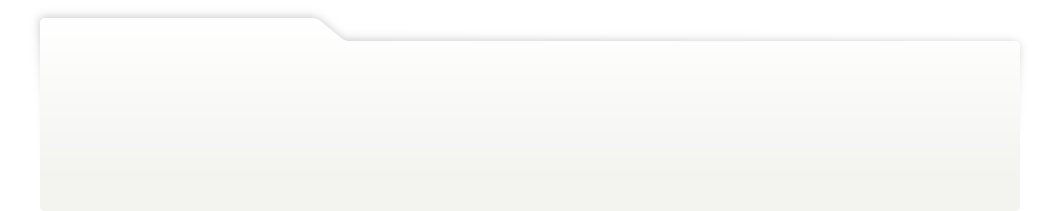
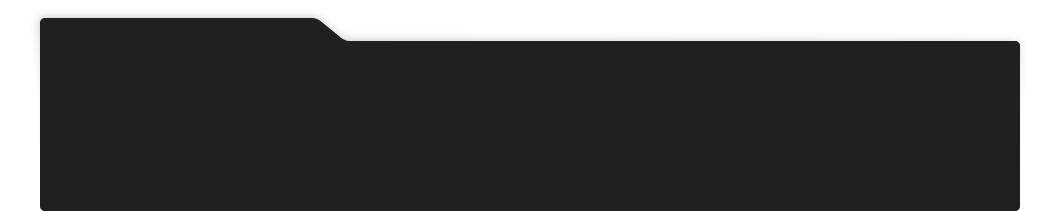
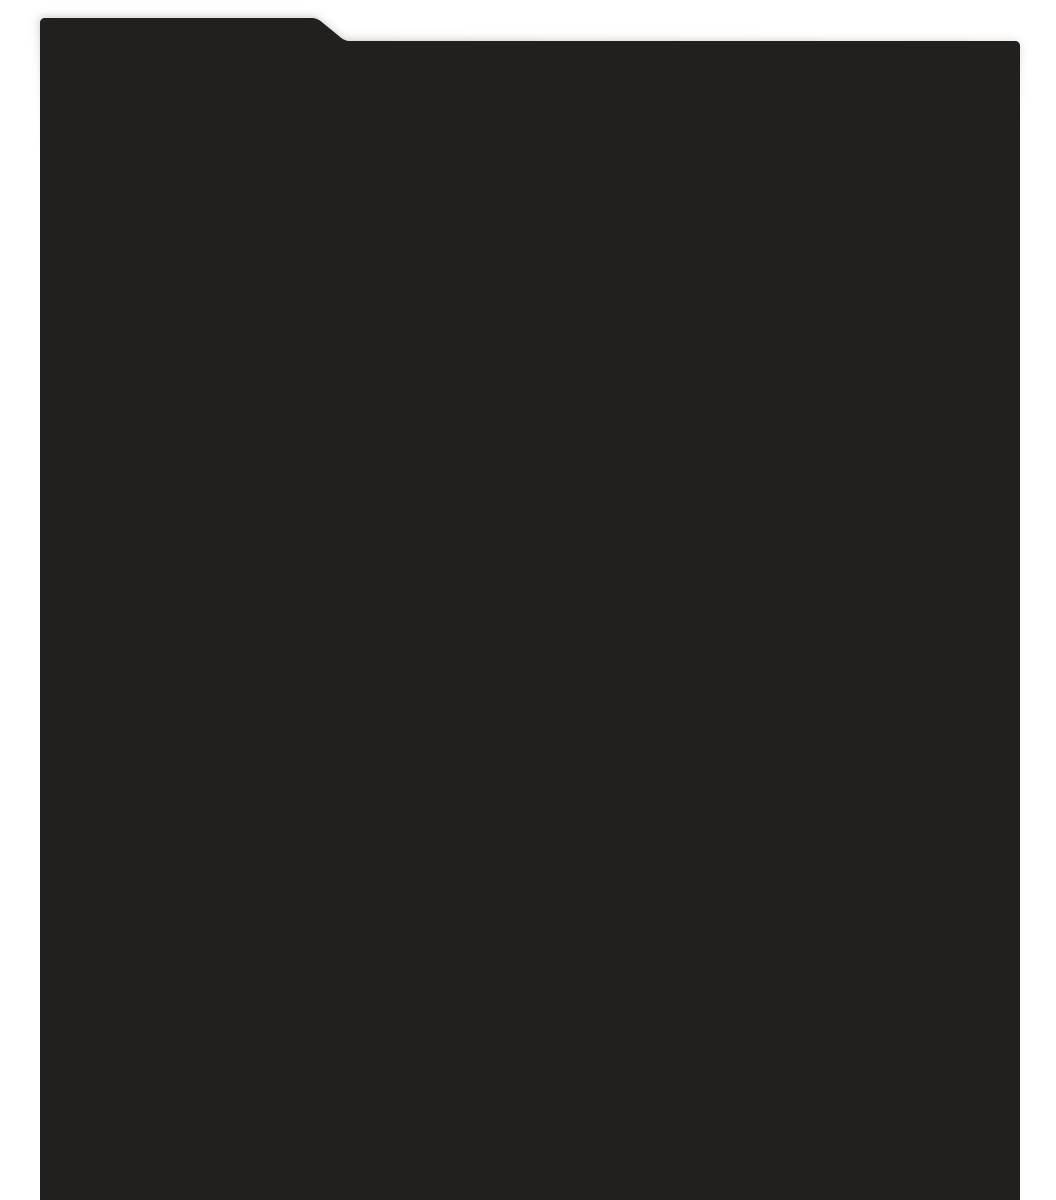
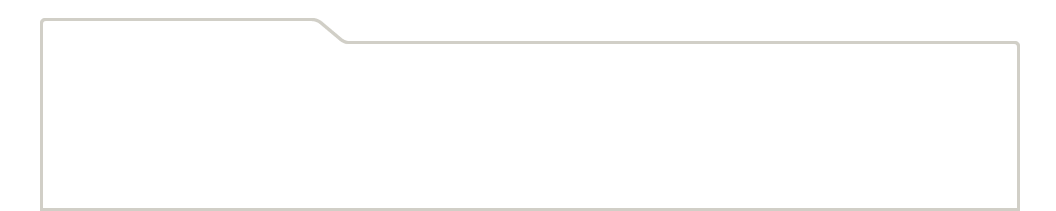
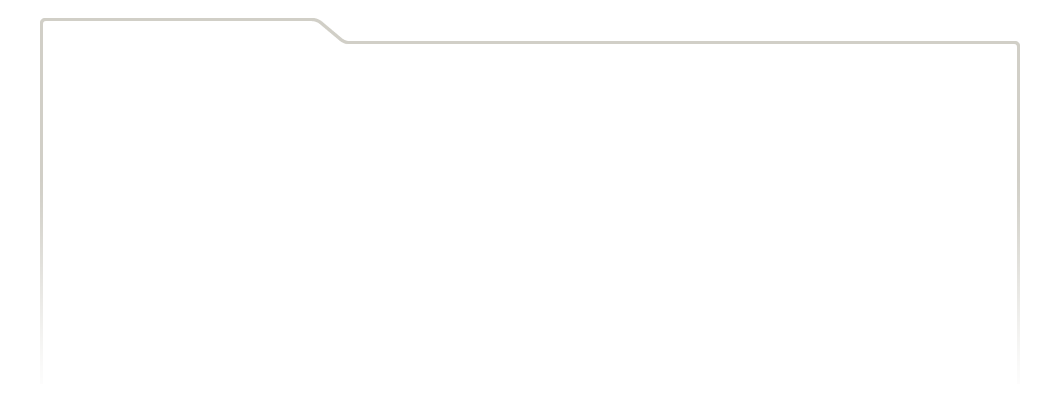
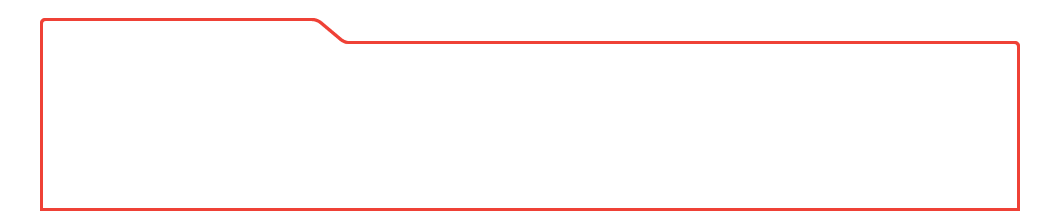
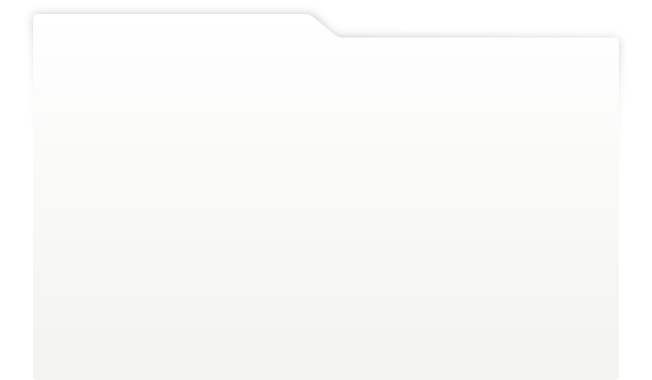
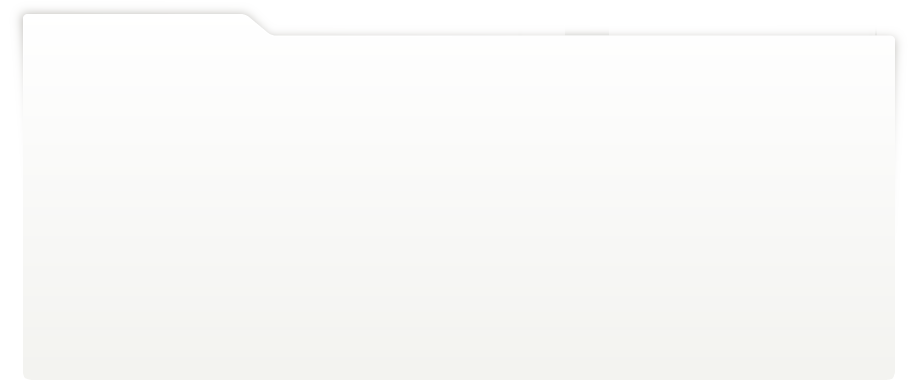
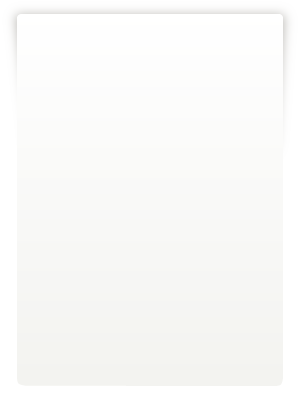
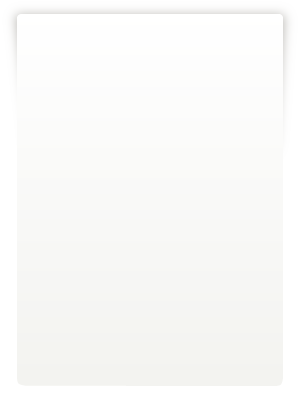
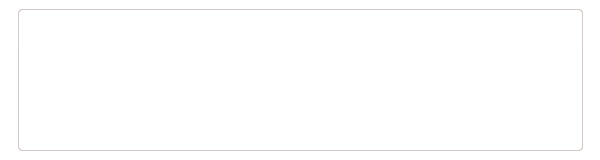
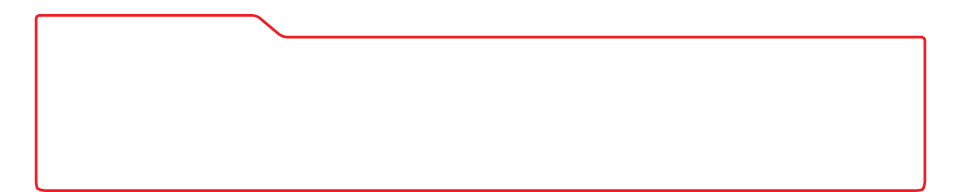
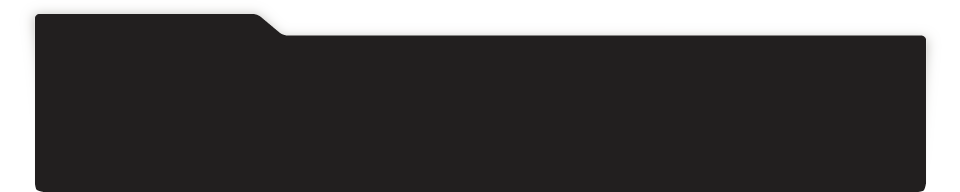
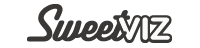
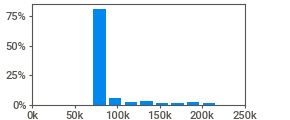
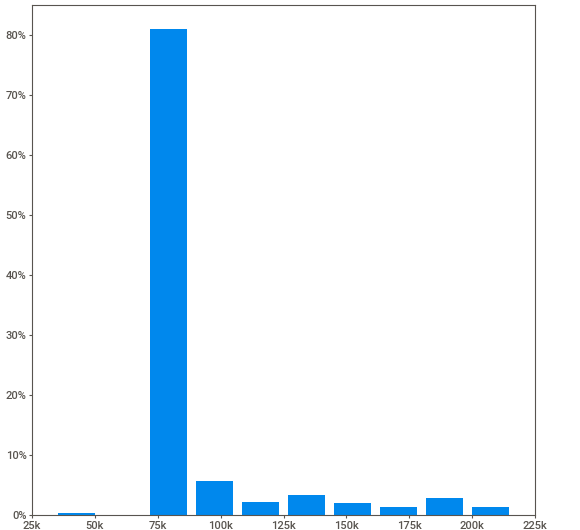
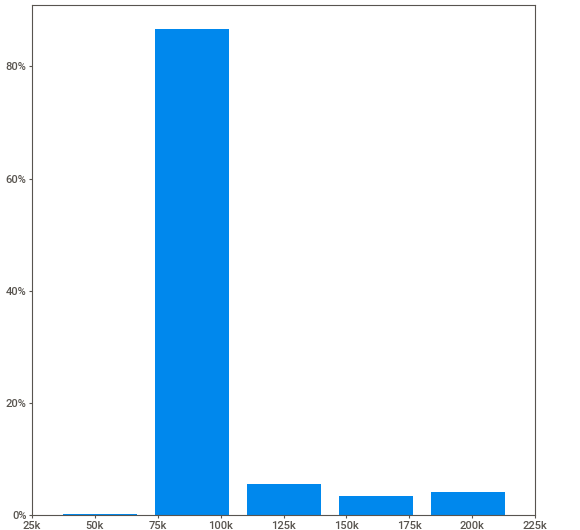
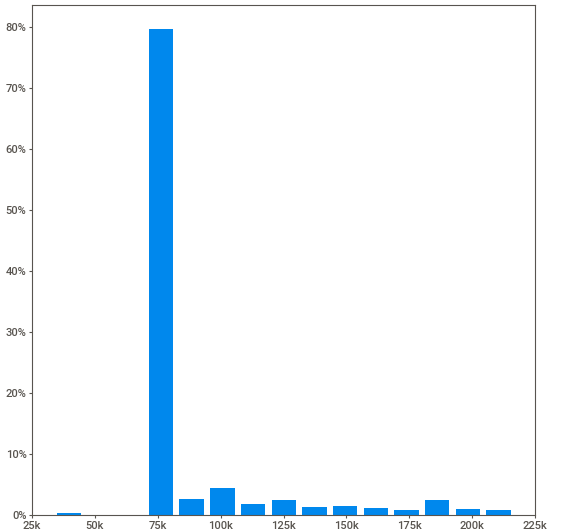
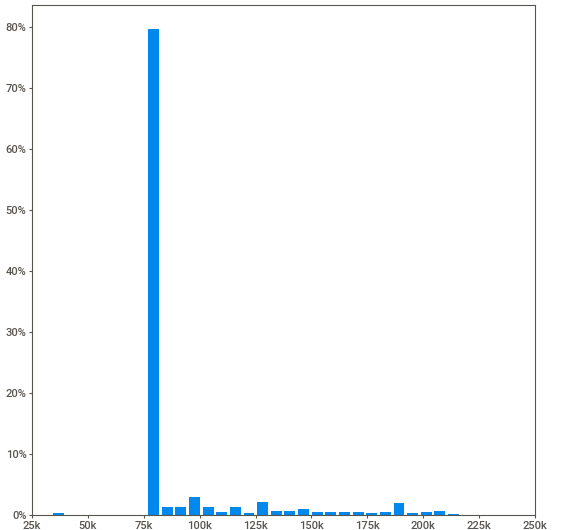
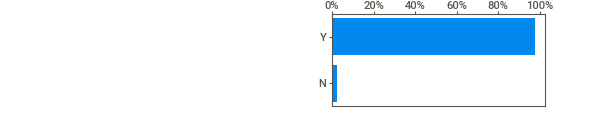
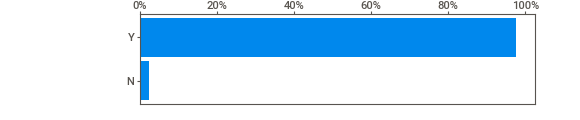
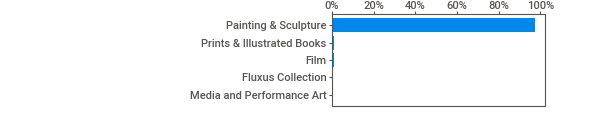
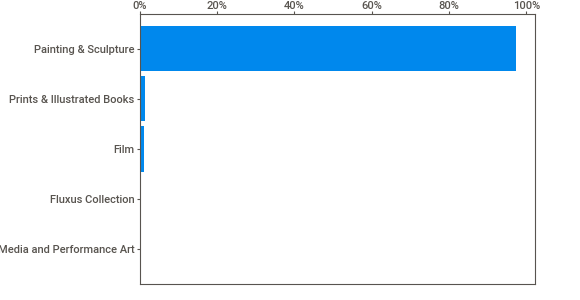
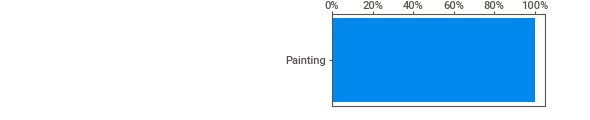
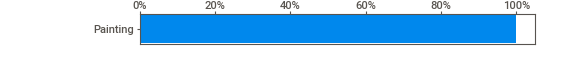
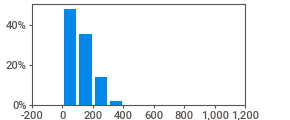
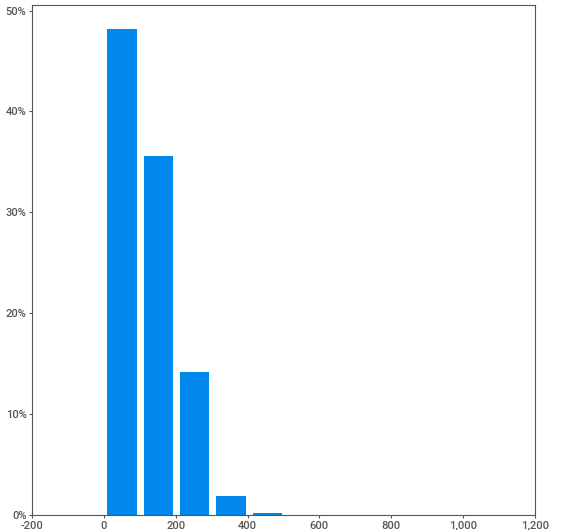
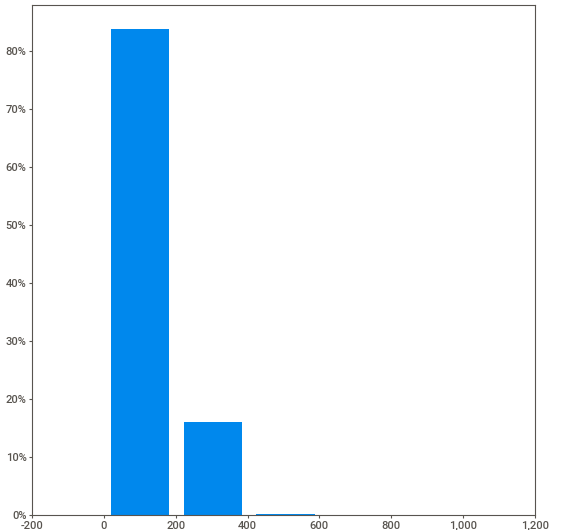
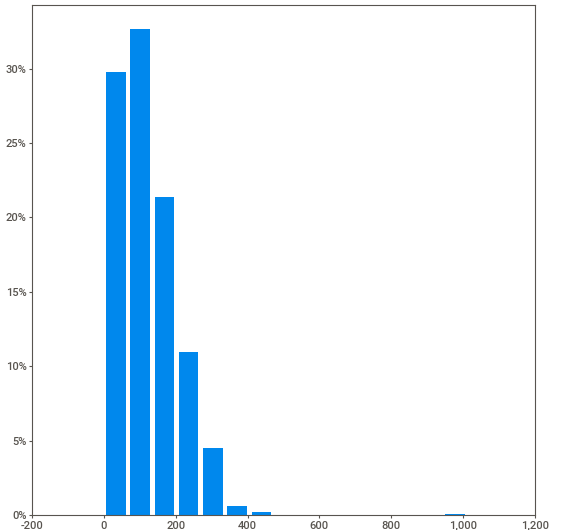
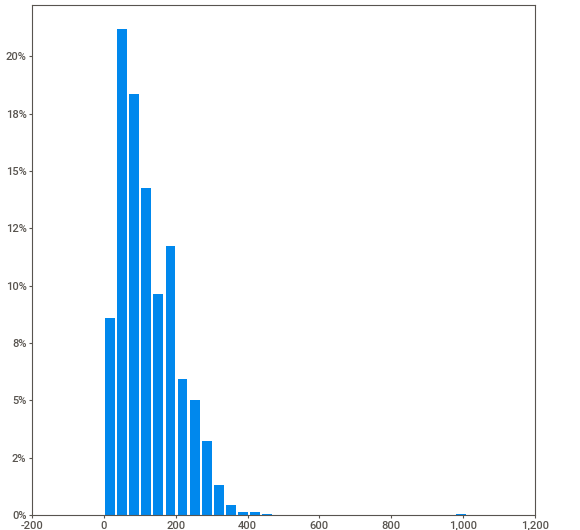
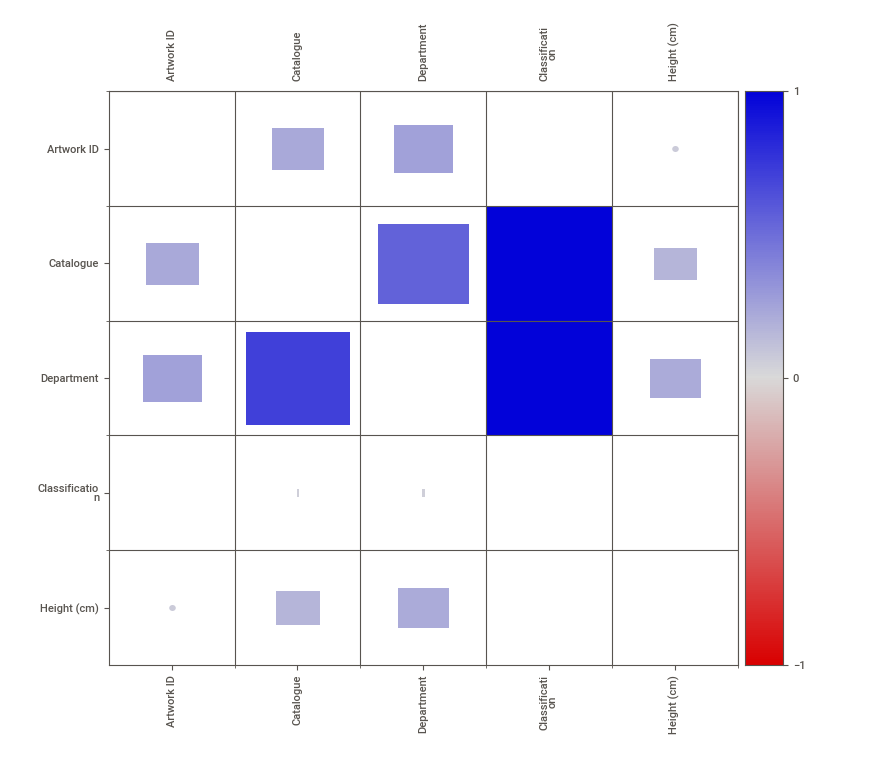
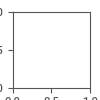

In [ ]:
report_1.show_notebook()

In [ ]:
df_paints['Height (cm)'].mean()

123.12998373747094

In [ ]:
df_paints.columns

Index(['Artwork ID', 'Title', 'Artist ID', 'Name', 'Date', 'Medium',
       'Dimensions', 'Acquisition Date', 'Credit', 'Catalogue', 'Department',
       'Classification', 'Object Number', 'Diameter (cm)',
       'Circumference (cm)', 'Height (cm)', 'Length (cm)', 'Width (cm)',
       'Depth (cm)', 'Weight (kg)', 'Duration (s)'],
      dtype='object')

In [ ]:
df_paints.drop(columns = ['Object Number', 'Diameter (cm)',
       'Circumference (cm)', 'Width (cm)',
       'Depth (cm)', 'Weight (kg)', 'Duration (s)'], inplace = True)

In [ ]:
df_paints.columns

Index(['Artwork ID', 'Title', 'Artist ID', 'Name', 'Date', 'Medium',
       'Dimensions', 'Acquisition Date', 'Credit', 'Catalogue', 'Department',
       'Classification', 'Height (cm)', 'Length (cm)'],
      dtype='object')

In [ ]:
df_paints.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/paints.csv', index= False)

In [ ]:
df_paints.groupby('Name').agg({'Artwork ID': 'count'})

Artwork ID
Name                                 
A. E. Gallatin                      1
A.R. Penck (Ralf Winkler)           1
Abraham Palatnik                    2
Abraham Rattner                     1
Abraham Walkowitz                   1
...                               ...
Zbigniew Makowski                   1
Zvi Gali                            1
Édouard Vuillard                    4
Émile Bernard                       1
Öyvind Fahlström                    1

[991 rows x 1 columns]

In [ ]:
df_paints_count = df_paints.groupby('Name').agg({'Artwork ID': 'count'}).copy()

In [ ]:
df_paints_count.reset_index(inplace= True)

In [ ]:
df_paints_count.columns

Index(['Name', 'Artwork ID'], dtype='object')

In [ ]:
df_paints_count.Name.count()

dtype('int64')

In [ ]:
df_paints_count.Name[df_paints_count['Artwork ID']> df_paints_count['Artwork ID'].median()].count()/df_paints_count.Name.count()

0.3683148335015136

In [ ]:
df_paints_count[df_paints_count['Artwork ID']> df_paints_count['Artwork ID'].median()].agg({'Artwork ID': 'sum'})/df_paints_count.agg({'Artwork ID': 'sum'})

Artwork ID    0.724108
dtype: float64

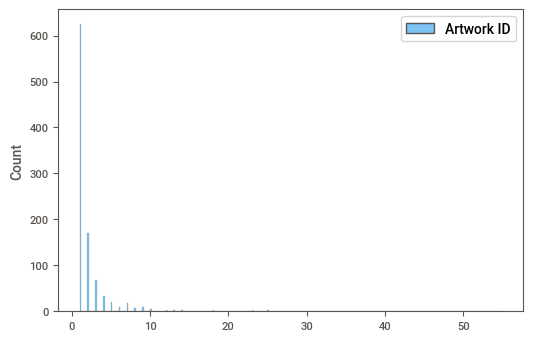

In [ ]:
sns.histplot(data= df_paints_count)

In [ ]:
import math

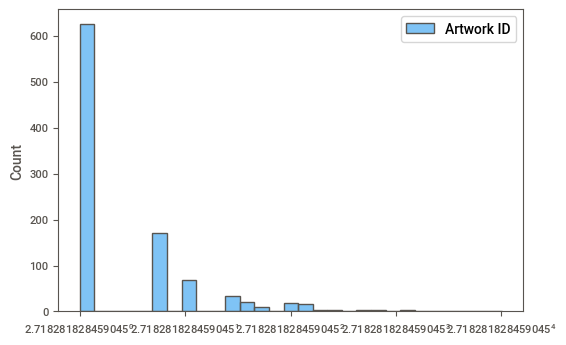

In [ ]:
sns.histplot(data= df_paints_count, log_scale= math.e)

In [ ]:
#df_paints_count
df_paints_count = df_paints_count.sort_values(by = 'Artwork ID', ascending = True)

In [ ]:
df_paints_count.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/paints_count.csv', index= False)

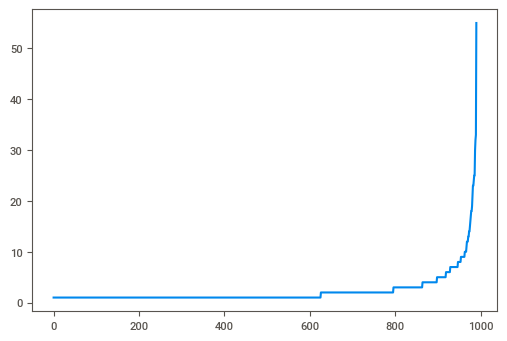

In [ ]:
n=list(df_paints_count['Artwork ID'])
sns.lineplot(data= n)


In [ ]:
df_paints_count[df_paints_count['Artwork ID']>=df_paints_count['Artwork ID'].quantile(q=.99)].sum()

Name          Batiste MadalenaPhilip GustonFrank StellaJean ...
Artwork ID                                                  291
dtype: object

In [ ]:
df_paints['Acquisition Date']=pd.to_datetime(df_paints['Acquisition Date'])

In [ ]:
df_time_series = df_paints.groupby('Acquisition Date').agg({'Artwork ID': 'count'}).reset_index()

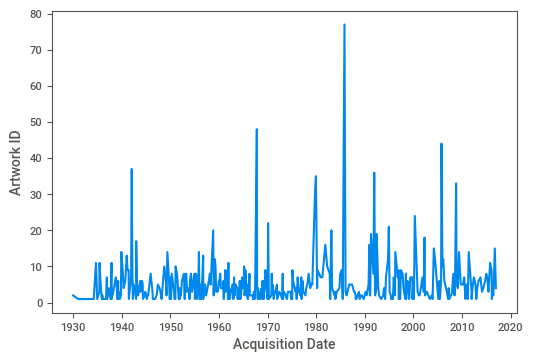

In [ ]:
sns.lineplot(data= df_time_series, x = 'Acquisition Date', y = 'Artwork ID')

In [ ]:
df_time_series.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/paints_timeseries.csv', index= False)

In [ ]:
df_time_series['Acquisition Date'].dt.month

0       1
1       1
2       3
3       6
4       4
       ..
451     2
452     4
453     6
454     9
455    12
Name: Acquisition Date, Length: 456, dtype: int64

In [ ]:
df_graph_año = df_time_series.groupby(df_time_series['Acquisition Date'].dt.year).agg({'Artwork ID': 'sum'}).copy().reset_index()

In [ ]:
df_graph_año

Acquisition Date  Artwork ID
0               1930           2
1               1931           2
2               1932           1
3               1934          14
4               1935          22
..               ...         ...
81              2012          22
82              2013          22
83              2014          21
84              2015          21
85              2016          34

[86 rows x 2 columns]

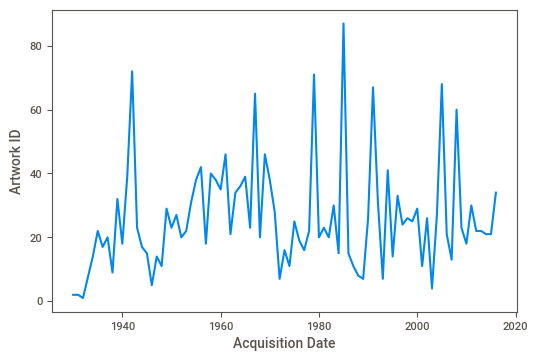

In [ ]:
sns.lineplot(data= df_graph_año, x = 'Acquisition Date', y = 'Artwork ID')

In [ ]:
df_graph_mes = df_time_series.groupby(df_time_series['Acquisition Date'].dt.month).agg({'Artwork ID': 'sum'}).copy().reset_index()

In [ ]:
df_graph_mes

Acquisition Date  Artwork ID
0                  1         155
1                  2         186
2                  3         164
3                  4         251
4                  5         190
5                  6         168
6                  7          24
7                  8           1
8                  9          92
9                 10         492
10                11         115
11                12         421

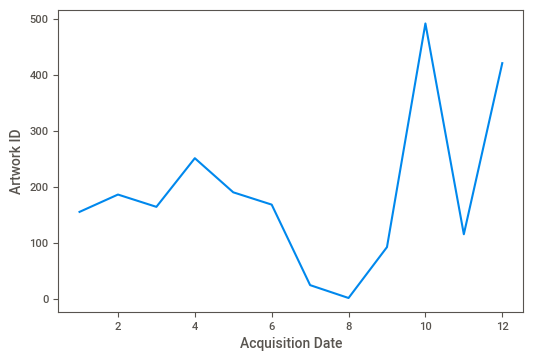

In [ ]:
sns.lineplot(data= df_graph_mes, x = 'Acquisition Date', y = 'Artwork ID', markers = 'o')

In [ ]:
df_paints[df_paints['Acquisition Date'].dt.month == 8]

Artwork ID              Title Artist ID            Name      Date  \
74274       79950  Manchester Valley      4614  Joseph Pickett  1914-18?   

                        Medium                           Dimensions  \
74274  Oil with sand on canvas  45 1/2 x 60 5/8" (115.4 x 153.7 cm)   

      Acquisition Date                            Credit Catalogue  \
74274       1939-08-24  Gift of Abby Aldrich Rockefeller         Y   

                 Department Classification  Height (cm)  Length (cm)  
74274  Painting & Sculpture       Painting        115.4          NaN

In [ ]:
dimensions_list =list(df_paints.Dimensions)

In [ ]:
import re

In [ ]:
i= dimensions_list[89]

In [ ]:
re.findall('\(',i)

['(']